---

# What is "Sismoavalanche"?

Sismoavalanche is a project with two objectives :
- 1. Try to find the morphometric parameters of avalanches using the seismic signal
- 2. Improve the understanding of avalanche collapse dynamics by exploring a new field : avalanche entropy

The report of this study is available here : https://mega.nz/fm/cNVHSLoa

We will use the database ESEC : https://ds.iris.edu/spud/esec

---

# Read ESEC

## First, let's load the librairies and the ESEC

In [1]:
## Librairies
import pandas as pd

## Handmade librairies
import catalog
import figures

## Display catalog parameters
catalog.display_parameters() #To see the entire catalog when it is calling

In [2]:
## Load ESEC
ESEC = pd.read_csv("catalog/0_ESEC.txt", delimiter="|") 

## Now, let's open the catalog

Number of columns in ESEC : 56
Number of landslides in ESEC : 290


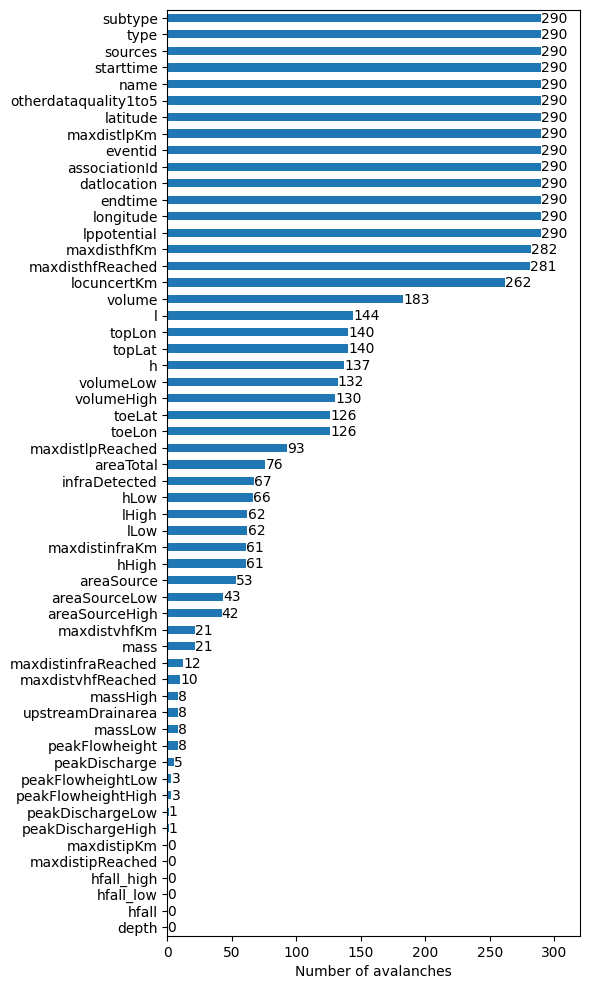

In [3]:
print("Number of columns in ESEC :", len(ESEC.columns))
print("Number of landslides in ESEC :", len(ESEC))

## To see the columns and the number of landslide in ESEC
catalog.open(ESEC, pos_number=0.260, xlim=320)

## Save the figure
figures.save("figures/ESEC_inspection.pdf")

## There are 290 events in ESEC. But, all the events are not avalanches. Let's filter that :

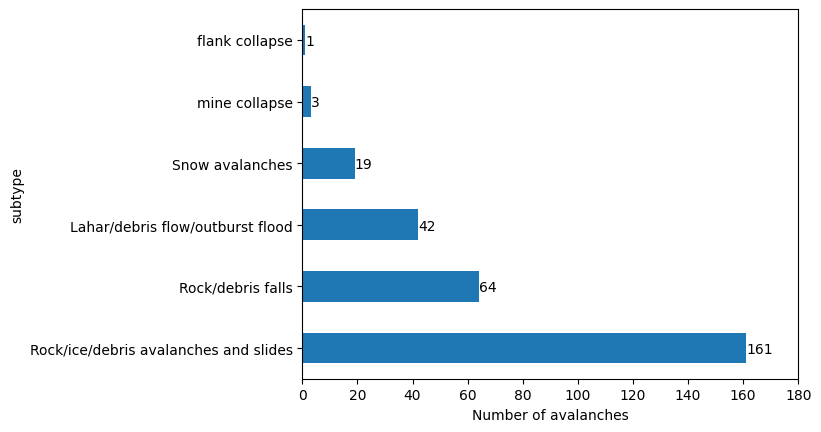

In [4]:
## To see the distribution of landslides in ESEC
catalog.see_word_distribution(ESEC["subtype"], pos_number=0.08, xlim=180)

## Save the figure
figures.save("figures/ESEC_subtype.pdf", tight_layout=False)

In [5]:
## Print the number of avalanches in ESEC
print("There are " + str(len(ESEC[ESEC["subtype"] == "Snow avalanches"]) + len(ESEC[ESEC["subtype"] == "Rock/ice/debris avalanches and slides"])) + " avalanches in ESEC")

## Keep only ESEC columns that contain the word "avalanche" in "subtype"
ESEC_avalanches = ESEC[ESEC["subtype"].str.contains("avalanche")]

There are 180 avalanches in ESEC


## As a reminder, we want to work only on avalanches. So, we will work with the 180 avalanches in ESEC.

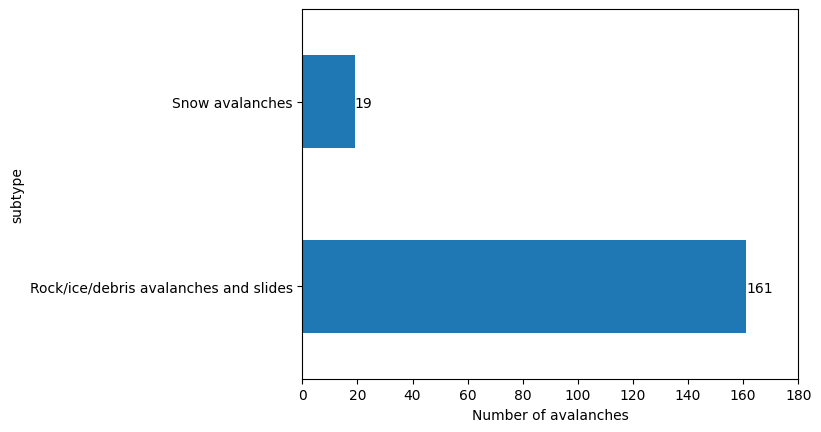

In [6]:
## To see the distribution of avalanches in ESEC
catalog.see_word_distribution(ESEC_avalanches["subtype"], pos_number=0.03, xlim=180)

ESEC_avalanches = ESEC_avalanches.reset_index(drop=True) # To reset all avalanche indexes and end at 180 events
ESEC_avalanches.to_pickle("catalog/1_ESEC_avalanches_180.pickle") # Save the new catalog containing only avalanches